# IT Customer Churn
Status tetap berlangganan atau berhenti berlangganan (Churn) customer penting untuk di prediksi dalam sebuah perusahaan. Hal tersebut penting dipertimbangkan mengingat biaya yang dibutuhkan untuk menarik pelanggan baru dibandingkan mempertahankan customer lama. Prediksi churn pelanggan dapat memberikan peringatan dini bagi perusahaan untuk menetapkan kebijakan untuk mempertahankan customer yang berpeluang besar churn. Maka dari itu, dalam sebuah perusahaan penting untuk memodelkan pelanggan yang mungkin berhenti berlangganan (Churn).

Prediksi churn atau tidaknya pelanggan dapat dilakukan dengan memperhatikan beberapa hal seperti:
1. Demographic terdiri dari jenis kelamin, rentang usia (termasuk dalam usia senior atau muda), adanya partner dan ketergantungan customer
2. Layanan yang di ambil customer seperti, phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. informasi akun yang terdiri dari lama berlangganan (tenure), contract, metode pembayaran, paperless billing, biaya bulanan, and total biaya

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/data analysis/data latihan/IT_customer_churn.csv")

# Data Cleaning

In [3]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# memeriksa adanya missing value
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# memeriksa tipe data
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

terdapat kejanggalan pada total charges yang seharusdnya bertipe float karena merupakan nilai yang harus dibayarkan

In [6]:
# memeriksa adanya kolom total charge yang kosong
df[df['TotalCharges'] == ' '].head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No


terdapat baris dengan total charge kosong

In [7]:
# merubah total charge menjadi float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

terdapat missing value pada total charges, missing value terjadi karena total charge yang kosong diubah menjadi missing value

In [9]:
df[df['tenure'] == 0].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [10]:
df[(df['TotalCharges'].isna()) & (df['Churn'] == 'No')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


berdasarkan hasil di atas terlihat bahwa, pelanggan dengan total charges di kosongkan merupakan pelanggan dengan tenure 0 atau berlanggan belum mencapai 1 tahun.

penangan data kosong dilakukan dengan menghapus baris karena data hilang hanya 11 dari 7042 baris atau tidak mencapai 1%

In [11]:
# menghapus missing value
df = df.dropna()

In [12]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
print('tenure minimum')
print(df[df['tenure'] == 1].shape)
print(df[(df['tenure'] == 1) & (df['Churn'] == "Yes")].shape)
print('median')
print(df[df['tenure'] == 29].shape)
print(df[(df['tenure'] == 29) & (df['Churn'] == "Yes")].shape)
print('tenure maksimum')
print(df[df['tenure'] == 72].shape)
print(df[(df['tenure'] == 72) & (df['Churn'] == "Yes")].shape)


tenure minimum
(613, 20)
(380, 20)
median
(72, 20)
(15, 20)
tenure maksimum
(362, 20)
(6, 20)


In [15]:
print(380/613)
print(15/72)
print(6/362)

0.6199021207177814
0.20833333333333334
0.016574585635359115


Berdasarkan hasi di atas dapat diketahui bahwa :
1. rata-rata pelanggan telah berlangganan selama 32 tahun dengan rata-rata biaya bulanan 64.798 dan rata-rata total biaya 2283.30
2. semakin lama waktu berlangganan, semakin sedikit pelanggan yang churn. terlihat dari proporsi churn yang semakin kecil pada tanure minimum, median dan maksimum

## Visualization

In [16]:
# membuat fungsi untuk mempermudah visualisasi
def plot_count (b):
    sns.countplot(df, x = b, hue = 'Churn')

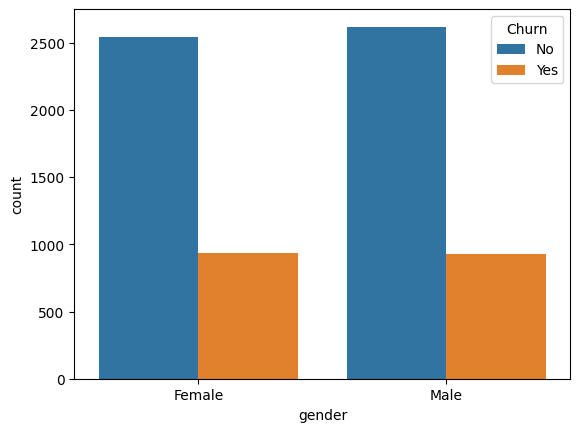

In [17]:
plot_count('gender')

pelanggan laki-laki dan perempuan tidak jauh berbeda

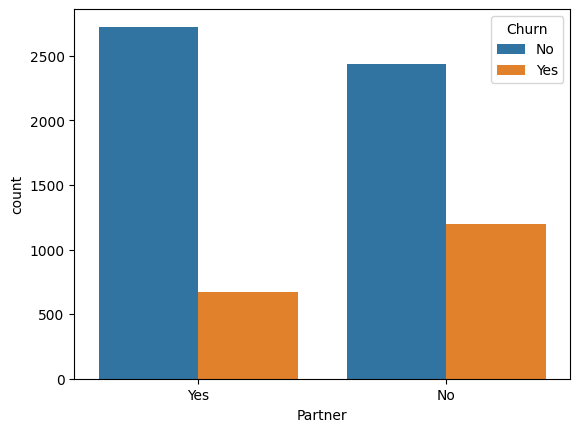

In [18]:
plot_count('Partner')

lebih banyak pelanggan yang berlangganan dengan memiliki partner dengan lebih sedikit pelanggan yang churn

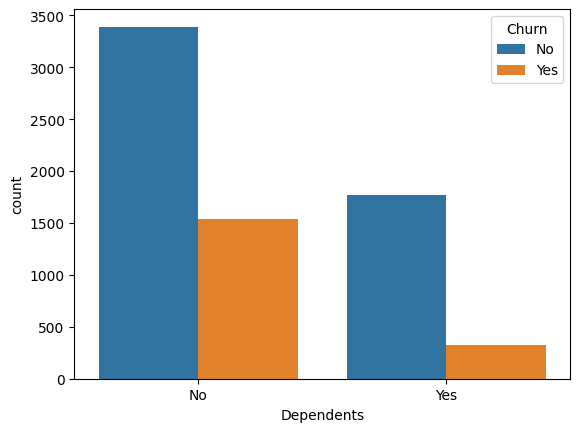

In [19]:
plot_count('Dependents')

berdasarkan ketergantungan lebih banyak pelanggan yang independen

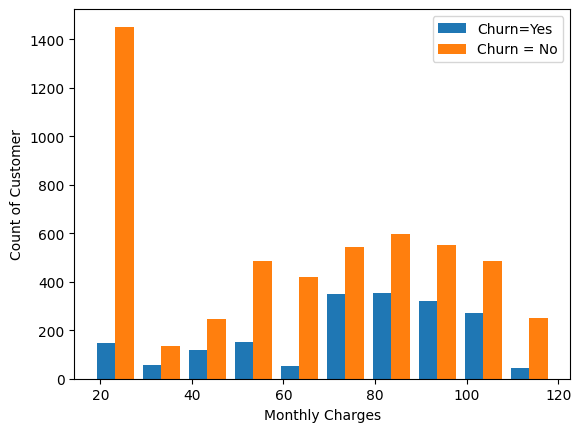

In [20]:
m_yes = df[df['Churn'] == 'Yes'].MonthlyCharges
m_no = df[df['Churn'] == 'No'].MonthlyCharges
plt.hist([m_yes, m_no], label=['Churn=Yes', 'Churn = No']) 
plt.xlabel("Monthly Charges")
plt.ylabel("Count of Customer")
plt.legend()

sebagian besar pelanggan berlangganan dengan biaya bulanan sekitar 20 dengan perbandingan pelanggan yang churn sangat kecil.

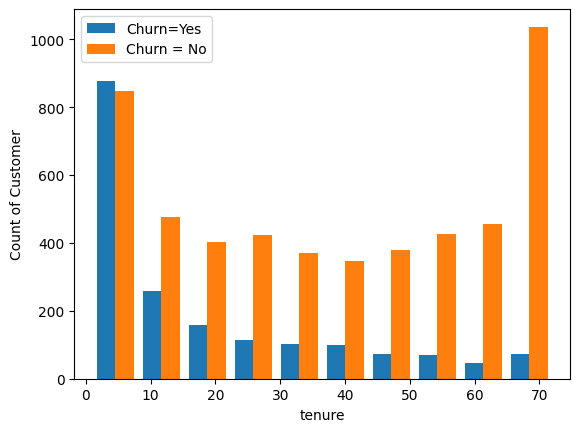

In [21]:
m_yes = df[df['Churn'] == 'Yes'].tenure
m_no = df[df['Churn'] == 'No'].tenure
plt.hist([m_yes, m_no], label=['Churn=Yes', 'Churn = No']) 
plt.xlabel("tenure")
plt.ylabel("Count of Customer")
plt.legend()

plot di atas menunjukkan bahwa pelanggan lebih banyak churn di awal-awal berlangganan. Semakin lama pelanggan berlangganan semakin sedikit churn yang terjadi

## modeling

In [31]:
# mengubah churn dengan kategori No menjadi 0 dan Yes menjadi 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
# mengubah churn menjadi integer
df['Churn'] = df['Churn'].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14032\3320956582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].astype(int)


In [32]:
# senior citizen merupakan data kategorik sehingga harus dirubah menjadi string 
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
print(df.dtypes)

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14032\932026785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)


0    5163
1    1869
Name: Churn, dtype: int64


<AxesSubplot: xlabel='Churn', ylabel='count'>

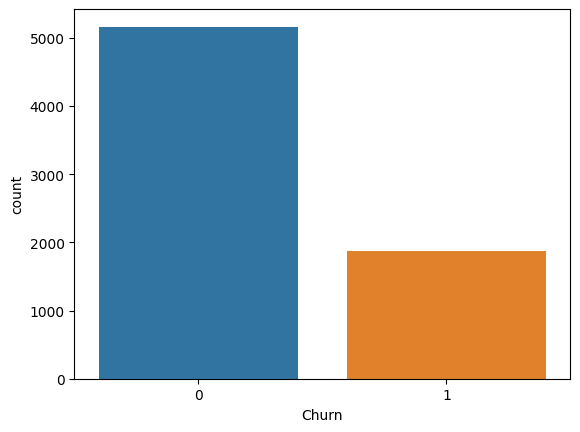

In [33]:
# perbandingan churn dan no churn
print(df['Churn'].value_counts())
sns.countplot(data = df, x = 'Churn')

perbandingan antara custumer churn dan tidak churn tidak churn terlihat tidak balance. Kondisi data tidak balance dapat berpengaruh pada hasil prediksi. Data yang tidak balance dapat menyebabkan hasil prediksi lebih condong kepada kategori mayoritas. Sehingga adanya unbalanced data harus ditangani terlebih dahulu.

Salah satu cara menangani unbalanced data adalah dengan melakukan oversampling yaitu dengan menyesuaikan kategori minoritas menjadi sama dengan kategori mayoritas sehingga kedua kategori menjadi balance

In [34]:
churn_yes = df[df['Churn'] == 1]
churn_no = df[df['Churn'] == 0]
#proses yang dilakukan adalah oversampling (menduplikasi kategori yang lebih kecil sehingga kedua kategori menjadi balance)
from sklearn.utils import resample
upsample = resample(churn_yes, replace= True,
                    n_samples= 5163, random_state= 42)

In [35]:
#menggabungkan kategori yang sudah di upsample
df_new = pd.concat([churn_no, upsample])

In [36]:
df_new['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [38]:
# memisahkan variabel prediktor dengan respon
X_var= df_new.loc[:, df_new.columns != 'Churn']
Y = df_new['Churn']
# merubah data kategorik menjadi variabel dummy sesuai dengan kategori yang terdapat di dalamnya
X = pd.get_dummies(X_var)
X.head(2)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [39]:
# membagi data train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,
                                                    random_state= 42)

dilakukan pembandingan beberapa metode klasifikasi yaitu regresi logistik, decision tree dan random forest classifier. Pada random forest classifier dilakukan hyperparameter tuning yang dilakukan dengan menentukan hyperparameter terbaik dalam membentuk model random forest.

In [40]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(X_train, Y_train)

In [41]:
#Decision Tree
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, Y_train)

In [42]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, Y_train)

In [43]:
#hyperparameter tuning
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [44]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [45]:
# best score terbaik yang dihasilkan
grid_search.best_score_

0.8228813559322035

In [46]:
rf_tuning = grid_search.best_estimator_
tuning_model = rf_tuning.fit(X_train, Y_train)

# Model Evaluation

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 

In [48]:
#prediksi
lr_pred = lr_model.predict(X_test)
dtree_pred = dtree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
tuning_pred = tuning_model.predict(X_test)


confusion matrix merupakan matrix yang menunjukkan 4 elemen yaitu :
1. true positive yaitu kasus yang di prediksikan berkategori 1 dan prediksi benar 
2. false positive yaitu kasus yang di prediksikan 1 namun prediksi salah (1,2)
3. false negative yaitu kasus yang diprediksikan 0 namun prediksi salah (2,1)
4. true negatice yaitu kasus yang diprediksikan 1 dan benar (2,2)

In [49]:
# confusion matrix
print("logistic regression")
print(pd.crosstab(Y_test, lr_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print("decision tree")
print(pd.crosstab(Y_test, dtree_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print("Random Forest")
print(pd.crosstab(Y_test, rf_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print("random forest tuning")
print(pd.crosstab(Y_test, tuning_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))

logistic regression
Predicted    0     1   All
Actual                    
0          778   286  1064
1          201   801  1002
All        979  1087  2066
decision tree
Predicted    0     1   All
Actual                    
0          862   202  1064
1           47   955  1002
All        909  1157  2066
Random Forest
Predicted    0     1   All
Actual                    
0          912   152  1064
1           39   963  1002
All        951  1115  2066
random forest tuning
Predicted    0     1   All
Actual                    
0          845   219  1064
1          111   891  1002
All        956  1110  2066


berdasarkan output di atas terlihat bahwa kasus dengan false positive dan false negative terkecil adalah pemodelan dengan random forest tanpa tuning

In [50]:
#presisi
print("logistic regression")
print(precision_score(Y_test, lr_pred))
print("decision tree")
print(precision_score(Y_test, dtree_pred))
print("Random Forest")
print(precision_score(Y_test, rf_pred))
print("random forest tuning")
print(precision_score(Y_test, tuning_pred))

logistic regression
0.7368905243790248
decision tree
0.8254105445116681
Random Forest
0.863677130044843
random forest tuning
0.8027027027027027


presisi merupakan evaluasi model dalam kasus ini adalah perbandingan antara jumlah prediksi benar untuk customer churn dengan seluruh customer yang diprediksikan churn. presisi akan menunjukkan seberapa baik prediksi churn customer yang dihasilkan model, semakin besar skor presisi maka semakin besar perbedaan true positive dibandingkan false postive sehingga model dinyatakan presisi.
dalam hal ini model terbaik adalah random forest

In [51]:
#recall score
print("logistic regression")
print(recall_score(Y_test, lr_pred))
print("decision tree")
print(recall_score(Y_test, dtree_pred))
print("Random Forest")
print(recall_score(Y_test, rf_pred))
print("random forest tuning")
print(recall_score(Y_test, tuning_pred))

logistic regression
0.7994011976047904
decision tree
0.9530938123752495
Random Forest
0.9610778443113772
random forest tuning
0.8892215568862275


recall merupakan evaluasi yang dilakukan dengan membandingkan seluruh prediksi benar untuk customer churn dibandingkan dengan seluruh customer yang sebenarnya churn. recall menunjukkan kebaikan model dalam memprediksi chustomer yang churn dengan tepat sehingga jumlah customer churn yang diprediksi tidak churn diharapkan kecil. 
dalam kasus ini model terbaik adalah random forest

In [52]:
#accuracy score
print("logistic regression")
print(accuracy_score(Y_test, lr_pred))
print("decision tree")
print(accuracy_score(Y_test, dtree_pred))
print("Random Forest")
print(accuracy_score(Y_test, rf_pred))
print("random forest tuning")
print(accuracy_score(Y_test, tuning_pred))

logistic regression
0.7642787996127783
decision tree
0.8794772507260407
Random Forest
0.9075508228460794
random forest tuning
0.8402710551790901


akurasi merupakan perbandingan antara jumlah prediksi benar (true positive + true negative) dengan total keseluruhan prediksi. Berdasarkan hasil score akurasi terbesar dimiliki oleh random forest maka dinyatakan bahwa random forest mampu menghasilkan prediksi yang paling tepat dibanding model lainnya

# Kesimpulan
1. Customer yang baru bergabung memerlukan perhatian lebih karena customer lebih rentan churn diawal masa berlangganan.
2. skor presisi, recall dan akurasi secara serentak menunjukkan bahwa model random forest merupakan model terbaik